In [40]:
import os
import sys
import util as u
import matplotlib.pyplot as plt
import torch.nn.functional as F

# Deep autoencoder

Optimize the following sigmoid autoencoder on first 10k MNIST examples, evaluate on second 10k 

![deep autoencoder](https://i.stack.imgur.com/f09ot.png)

# Short run

In [105]:
import kfac_pytorch as kfac_lib

In [107]:
losses_adam, vlosses_adam = kfac_lib.train(iters=10, kfac=False, print_interval=1)
u.summarize_time()

Step   0 loss 97.542419434
Step   1 loss 32.184158325
Step   2 loss 31.059148788
Step   3 loss 30.073652267
Step   4 loss 28.751443863
Step   5 loss 28.019514084
Step   6 loss 27.574556351
Step   7 loss 27.251935959
Step   8 loss 27.024274826
Step   9 loss 26.863992691
Times: min: 87.59, median: 88.08, mean: 1256.60


In [106]:
losses_adam, vlosses_adam = kfac_lib.train(iters=10, kfac=True, print_interval=1)
u.summarize_time()

Step   0 loss 97.542419434
Step   1 loss 62.339828491
Step   2 loss 44.860393524
Step   3 loss 79.031013489
Step   4 loss 56.055324554
Step   5 loss 48.206447601
Step   6 loss 43.934066772
Step   7 loss 40.302700043
Step   8 loss 38.371196747
Step   9 loss 38.781795502
Times: min: 384.54, median: 388.57, mean: 1689.78


# Long run

python run_experiments.py

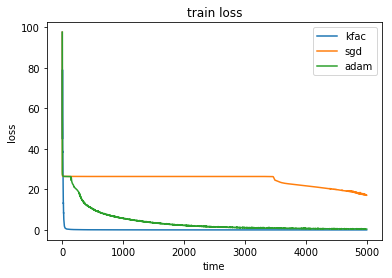

In [109]:
def plotit(fn, label, subsample=1):
  vals = np.loadtxt('data/'+fn+".csv", delimiter=",")
  vals = vals[::subsample]
  plt.plot(vals, label=label)
  
import numpy as np
import matplotlib.pyplot as plt

plt.figure()
plotit('losses_sgd_kfac', 'kfac')
plotit('losses_sgd', 'sgd', 4)
plotit('losses_adam', 'adam', 4)

plt.xlabel('time')
plt.ylabel('loss')
plt.title('train loss')

plt.legend()
plt.show()

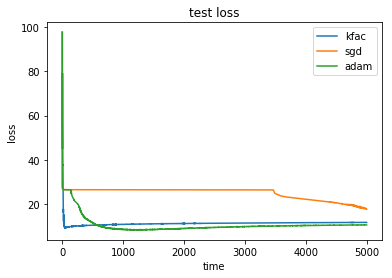

In [110]:
plt.figure()
plotit('vlosses_sgd_kfac', 'kfac')
plotit('vlosses_sgd', 'sgd', 4)
plotit('vlosses_adam', 'adam', 4)

plt.xlabel('time')
plt.ylabel('loss')
plt.title('test loss')

plt.legend()
plt.show()

- final test loss is higher for KFAC (8.48 Adam vs 9.4 KFAC)
- KFAC takes 100x less iteration
- KFAC takes 25x less wall-clock time